<a href="https://colab.research.google.com/github/ghzljbrz/machin-learning-2024/blob/main/MP3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Dimensionality Reduction

##2.1.1 Noise Characteristics for mnist data

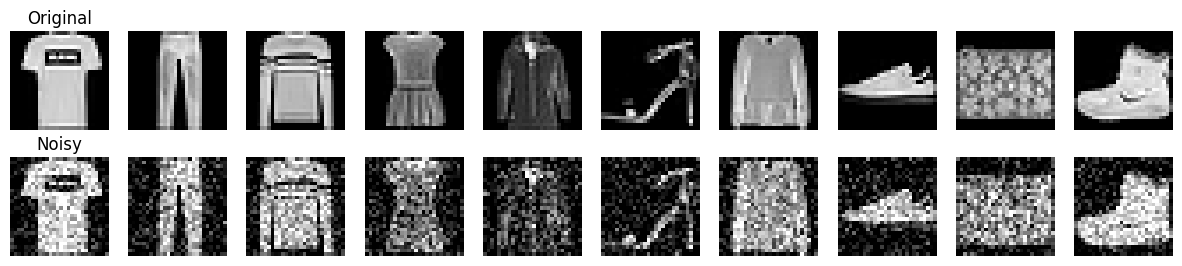

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# بارگذاری Fashion-MNIST
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
X = X.reshape(-1, 28, 28) / 255.0

# انتخاب یک نمونه از هر کلاس
indices = [np.where(y == str(label))[0][0] for label in range(10)]
images = X[indices]

# افزودن نویز گاوسی
noise = np.random.normal(0, 0.2, images.shape)
noisy_images = np.clip(images + noise, 0, 1)

# نمایش
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axes[0, i].imshow(images[i], cmap='gray'); axes[0, i].axis('off')
    axes[1, i].imshow(noisy_images[i], cmap='gray'); axes[1, i].axis('off')
axes[0, 0].set_title('Original'); axes[1, 0].set_title('Noisy')
plt.show()


##2.1.2 PCA From Scratch

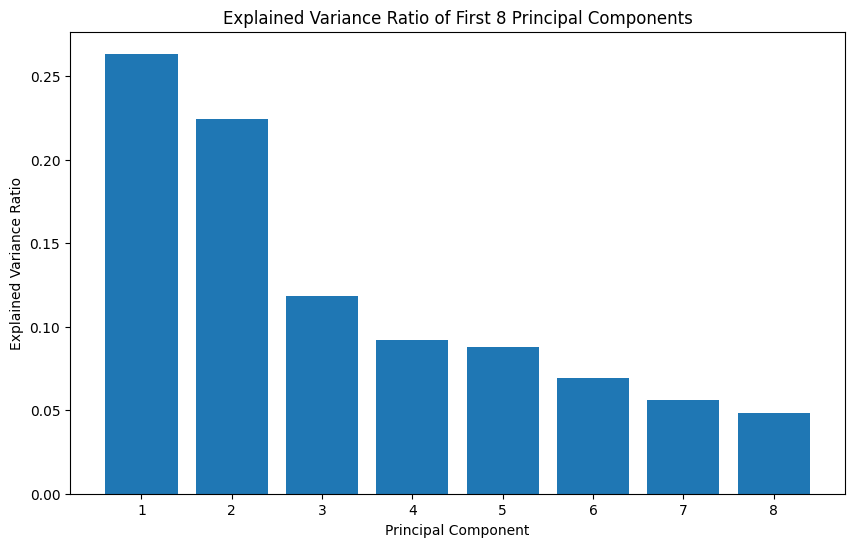

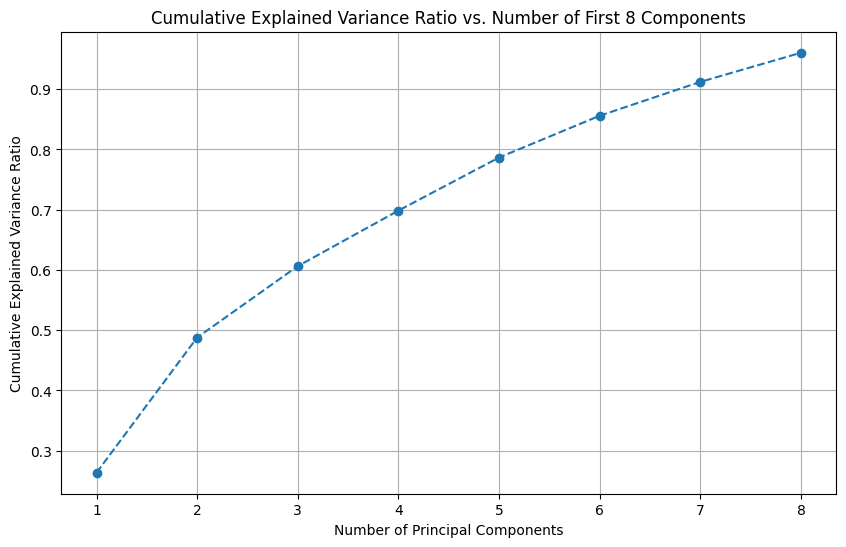

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Implementation of PCA without using ready-made libraries

def center_data(X):
    """Centers the data by subtracting the mean of each feature."""
    mean = np.mean(X, axis=0)
    centered_X = X - mean
    return centered_X, mean

def calculate_covariance_matrix(X):
    """Calculates the covariance matrix of the centered data."""
    n_samples = X.shape[0]
    covariance_matrix = np.dot(X.T, X) / (n_samples - 1)
    return covariance_matrix

def calculate_eigenvalues_and_eigenvectors(covariance_matrix):
    """Calculates eigenvalues and eigenvectors of the covariance matrix."""
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Sort eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

def pca(X, n_components=None):
    """
    Performs Principal Component Analysis (PCA) without using ready-made libraries.

    Args:
        X (np.ndarray): The input data matrix (n_samples, n_features).
        n_components (int, optional): The number of components to keep.
                                      If None, all components are kept.

    Returns:
        tuple: A tuple containing:
            - transformed_X (np.ndarray): The data projected onto the principal components.
            - explained_variance_ratio (np.ndarray): The variance explained by each component.
            - components (np.ndarray): The principal components (eigenvectors).
            - mean (np.ndarray): The mean of the original data.
    """
    # 1. Center the data
    centered_X, mean = center_data(X)

    # 2. Calculate the covariance matrix
    covariance_matrix = calculate_covariance_matrix(centered_X)

    # 3. Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = calculate_eigenvalues_and_eigenvectors(covariance_matrix)

    # 4. Calculate explained variance ratio
    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = eigenvalues / total_variance

    # 5. Select the top n_components eigenvectors
    if n_components is not None:
        components = eigenvectors[:, :n_components]
    else:
        components = eigenvectors

    # 6. Project the data onto the principal components
    transformed_X = np.dot(centered_X, components)

    return transformed_X, explained_variance_ratio, components, mean

# Reshape images for PCA (flatten the 28x28 images)
# We will use the noisy images for this part
X_flat = noisy_images.reshape(noisy_images.shape[0], -1)

# Perform PCA
transformed_X, explained_variance_ratio, components, data_mean = pca(X_flat)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Define the number of components to display
num_components_to_show = 8

# Plot the explained variance ratio as a bar chart for the first 8 components
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_components_to_show + 1), explained_variance_ratio[:num_components_to_show])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f'Explained Variance Ratio of First {num_components_to_show} Principal Components')
plt.xticks(range(1, num_components_to_show + 1)) # Set x-ticks to show each component number
plt.show()

# Plot the cumulative explained variance for the first 8 components
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components_to_show + 1), cumulative_explained_variance[:num_components_to_show], marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title(f'Cumulative Explained Variance Ratio vs. Number of First {num_components_to_show} Components')
plt.grid(True)
plt.xticks(range(1, num_components_to_show + 1)) # Set x-ticks to show each component number
plt.show()

# Remove the code to find and print the number of components for 90% variance
# n_components_90_percent = np.argmax(cumulative_explained_variance >= 0.90) + 1
# plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')
# plt.axvline(x=n_components_90_percent, color='g', linestyle='--', label=f'{n_components_90_percent} components for >= 90%')
# plt.legend()
# plt.show()

# Remove the print statement for 90% variance
# print(f"Number of components needed to explain 90% or more of the variance: {n_components_90_percent}")

In [ ]:
# Find the number of components needed to explain 90% or more variance
n_components_90_percent = np.argmax(cumulative_explained_variance >= 0.90) + 1
# ... plotting code ...

print(f"Number of components needed to explain 90% or more of the variance: {n_components_90_percent}")

Number of components needed to explain 90% or more of the variance: 7


##2.1.3. PCA From Scikit-learn

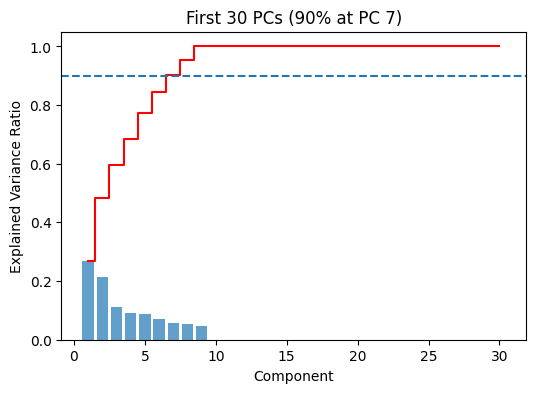

In [ ]:
# X_flat: ماتریس n×784 از تصاویر نویزی
X_flat = noisy_images.reshape(len(noisy_images), -1)
Xc = X_flat - X_flat.mean(axis=0)

# ماتریس کوواریانس
Sigma = np.cov(Xc, rowvar=False)
eigs, vecs = np.linalg.eigh(Sigma)
idx = np.argsort(eigs)[::-1]
eigs, vecs = eigs[idx], vecs[:, idx]

# سهم واریانس
explained = eigs / eigs.sum()
cum_explained = np.cumsum(explained)
n_components_90 = np.searchsorted(cum_explained, 0.90) + 1

# نمودار
plt.figure(figsize=(6,4))
plt.bar(np.arange(1, 31), explained[:30], alpha=0.7)
plt.step(np.arange(1, 31), cum_explained[:30], where='mid', color='red')
plt.axhline(0.90, linestyle='--')
plt.xlabel('Component'); plt.ylabel('Explained Variance Ratio')
plt.title(f'First 30 PCs (90% at PC {n_components_90})')
plt.show()


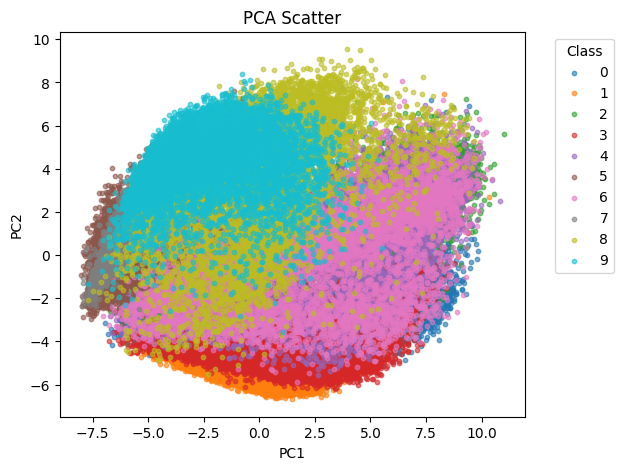

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# Apply PCA to the full flattened dataset X (assuming you still have the full X after the first cell)
# Or, if X_flat is intended to be the flattened version of the *full* noisy dataset,
# ensure that X_flat contains all 70000 examples.
# Based on the previous cells, it seems X_flat was created from `noisy_images`,
# which only contains 10 images. We need to apply PCA to the full dataset.

# Let's assume you want to apply PCA to the original X dataset, flattened
# Make sure you have the full X array from the first cell still available.
# If not, reload or process the full dataset X again.

# Re-flatten the original X for PCA
X_flat_full = X.reshape(len(X), -1)

# Apply PCA to the full dataset
X2 = pca.fit_transform(X_flat_full)

plt.figure(figsize=(6,5))
# Now loop through the labels and use the original y array for indexing X2
for label in range(10):
    # Create boolean index based on the original y array
    idx = y.astype(int) == label
    # Use the boolean index on the PCA-transformed data of the full dataset (X2)
    plt.scatter(X2[idx,0], X2[idx,1], s=10, label=label, alpha=0.6)

plt.legend(title='Class', bbox_to_anchor=(1.05,1))
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA Scatter')
plt.show()

##2.1.4.PCA for denoising

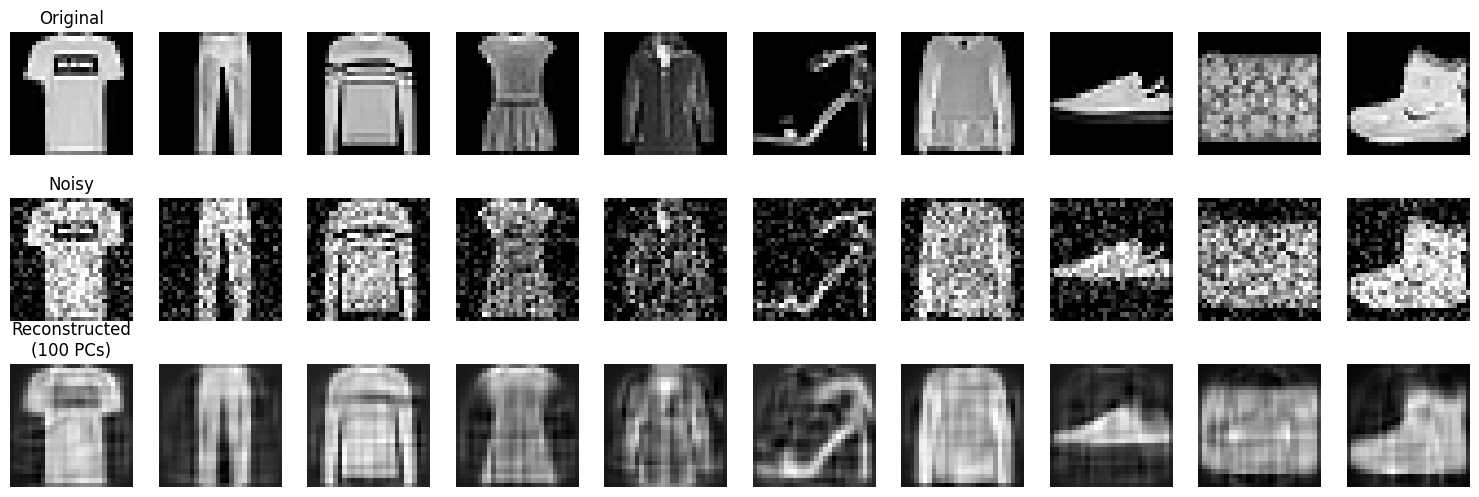

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# 1. بارگذاری و آماده‌سازی داده
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
X = X.reshape(-1, 28, 28) / 255.0

# انتخاب اولین نمونه از هر کلاس (۰ تا ۹)
indices = [np.where(y.astype(int)==label)[0][0] for label in range(10)]
orig_images = X[indices]

# 2. افزودن نویز گاوسی σ=0.2
noise = np.random.normal(0, 0.2, orig_images.shape)
noisy_images = np.clip(orig_images + noise, 0, 1)

# 3. PCA با 100 مؤلفه روی تمام تصاویر اصلی
X_flat_full = X.reshape(len(X), -1)
pca = PCA(n_components=100).fit(X_flat_full)

# 4. فشرده‌سازی و بازسازی تصاویر نویزی
noisy_flat = noisy_images.reshape(10, -1)
proj = pca.transform(noisy_flat)              # به زیرفضای PCA برو
recon_flat = pca.inverse_transform(proj)       # بازسازی
recon_images = recon_flat.reshape(10, 28, 28)

# 5. نمایش
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
for i in range(10):
    axes[0,i].imshow(orig_images[i], cmap='gray');    axes[0,i].axis('off')
    axes[1,i].imshow(noisy_images[i], cmap='gray');   axes[1,i].axis('off')
    axes[2,i].imshow(recon_images[i], cmap='gray');   axes[2,i].axis('off')

axes[0,0].set_title('Original', fontsize=12)
axes[1,0].set_title('Noisy', fontsize=12)
axes[2,0].set_title('Reconstructed\n(100 PCs)', fontsize=12)
plt.tight_layout()
plt.show()


##2.1.5. LDA for classification

Explained variance ratio by LDA components: [0.44831978 0.21775407 0.09184762 0.07386435 0.06090357 0.04356078
 0.03805628 0.01595496 0.00973859]
Accuracy of Logistic Regression on LDA-transformed data: 0.8288


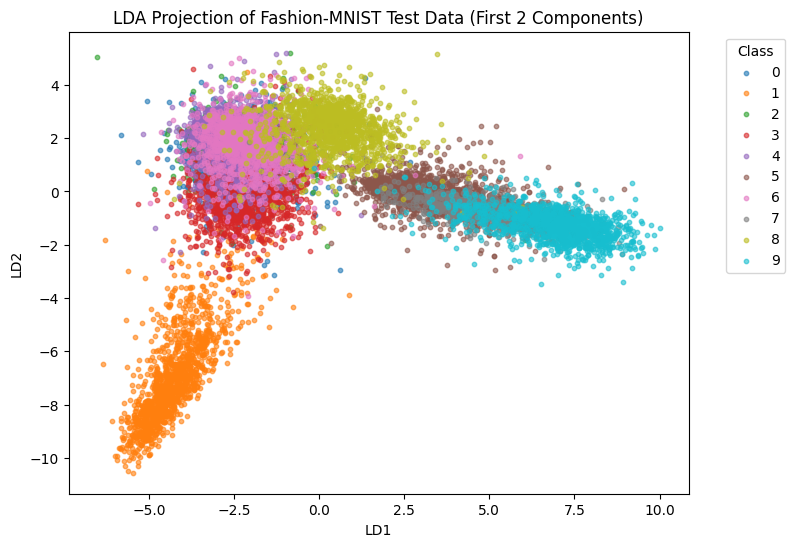

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml # Import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and flatten the full Fashion-MNIST dataset
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
X_flat_full = X.reshape(len(X), -1) / 255.0 # Ensure division by 255.0
y = y.astype(int) # Ensure y is integer type for consistent use

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat_full, y, test_size=0.2, random_state=42, stratify=y)

# Initialize LDA. For classification, the number of components should be
# min(n_classes - 1, n_features). For Fashion-MNIST, there are 10 classes,
# so we can have at most 9 components.
lda = LinearDiscriminantAnalysis(n_components=9)

# Fit LDA on the training data
# LDA requires the target variable y during fitting
lda.fit(X_train, y_train)

# Transform both training and testing data
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Print the explained variance ratio by each component
print("Explained variance ratio by LDA components:", lda.explained_variance_ratio_)

# You can now use the transformed data (X_train_lda, X_test_lda) to train a classifier
# For example, let's train a simple Logistic Regression classifier on the LDA-transformed data
from sklearn.linear_model import LogisticRegression

# Train a classifier on the LDA-transformed data
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_lda, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test_lda)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression on LDA-transformed data: {accuracy:.4f}")

# You can also visualize the LDA-transformed data, but for 9 components,
# you might want to look at the first 2 components or use other visualization techniques.
# Let's visualize the first 2 components for the test set.
plt.figure(figsize=(8, 6))
# y_test is already int type now
for label in np.unique(y_test):
    idx = y_test == label
    plt.scatter(X_test_lda[idx, 0], X_test_lda[idx, 1], label=label, s=10, alpha=0.6)

plt.legend(title='Class', bbox_to_anchor=(1.05, 1))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Projection of Fashion-MNIST Test Data (First 2 Components)')
plt.show()

##2.1.6 Separability Matrix

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

# بارگذاری و مسطح‌سازی
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
X = X.reshape(len(X), -1) / 255.0
y = y.astype(int)

# محاسبه میانگین کل
mu = X.mean(axis=0)              # (d,)

# آماده‌سازی Sw و Sb
d = X.shape[1]
Sw = np.zeros((d, d))
Sb = np.zeros((d, d))

# برای هر کلاس:
for cls in np.unique(y):
    idx = np.where(y == cls)[0]
    Xc = X[idx]                  # نمونه‌های کلاس cls
    Nc = Xc.shape[0]

    # میانگین کلاس
    mu_c = Xc.mean(axis=0)       # (d,)

    # ماتریس پراکندگی درون‌کلاسی
    # جمع (x - mu_c)(x - mu_c)^T
    Xc_centered = Xc - mu_c      # (Nc, d)
    Sw += Xc_centered.T @ Xc_centered

    # ماتریس پراکندگی برون‌کلاسی
    # Nc * (mu_c - mu)(mu_c - mu)^T
    diff = (mu_c - mu).reshape(-1, 1)
    Sb += Nc * (diff @ diff.T)

print("Sw shape:", Sw.shape, "– Sb shape:", Sb.shape)


Sw shape: (784, 784) – Sb shape: (784, 784)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# --- 1. آماده‌سازی داده‌ها ---
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
X = X.reshape(len(X), -1) / 255.0
y = y.astype(int)

# --- 2. کاهش بعد با PCA و LDA (هر کدام 2 کامپوننت) ---
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)                      # شکل: (70000, 2)

lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y)
X_lda = lda.transform(X)                      # شکل: (70000, 2)

# --- 3. تابع محاسبهٔ Sw و Sb ---
def compute_scatter_matrices(X_proj, y):
    classes = np.unique(y)
    mu = X_proj.mean(axis=0)          # میانگین کل در فضای کاهش‌یافته
    d = X_proj.shape[1]               # بعد جدید (۲)
    Sw = np.zeros((d, d))
    Sb = np.zeros((d, d))
    for cls in classes:
        idx = np.where(y == cls)[0]
        Xc = X_proj[idx]
        Nc = Xc.shape[0]
        mu_c = Xc.mean(axis=0)       # میانگین کلاس در فضای کاهش‌یافته
        # درون‌کلاسی
        Xc_centered = Xc - mu_c
        Sw += Xc_centered.T @ Xc_centered
        # برون‌کلاسی
        diff = (mu_c - mu).reshape(-1, 1)
        Sb += Nc * (diff @ diff.T)
    return Sw, Sb

# --- 4. محاسبه و نمایش ابعاد ماتریس‌ها ---
Sw_pca, Sb_pca = compute_scatter_matrices(X_pca, y)
Sw_lda, Sb_lda = compute_scatter_matrices(X_lda, y)

print("PCA → Sw:", Sw_pca.shape, " Sb:", Sb_pca.shape)
print("LDA → Sw:", Sw_lda.shape, " Sb:", Sb_lda.shape)


PCA → Sw: (2, 2)  Sb: (2, 2)
LDA → Sw: (2, 2)  Sb: (2, 2)


In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml

# 1. بارگذاری و مسطح‌سازی کامل دیتاست
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
X_flat = X.reshape(len(X), -1) / 255.0
y = y.astype(int)

# 2. اجرای LDA روی کل دیتاست
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_flat, y)

# 3. تابع محاسبه Sw و Sb
def compute_scatter_matrices(X_proj, y):
    classes = np.unique(y)
    mu = X_proj.mean(axis=0)
    d = X_proj.shape[1]
    Sw = np.zeros((d, d))
    Sb = np.zeros((d, d))
    for cls in classes:
        idx = np.where(y == cls)[0]
        Xc = X_proj[idx]
        Nc = Xc.shape[0]
        mu_c = Xc.mean(axis=0)
        # Sw
        Xc_centered = Xc - mu_c
        Sw += Xc_centered.T @ Xc_centered
        # Sb
        diff = (mu_c - mu).reshape(-1, 1)
        Sb += Nc * (diff @ diff.T)
    return Sw, Sb

# 4. محاسبه و چاپ ماتریس‌ها
Sw_lda, Sb_lda = compute_scatter_matrices(X_lda, y)
D = np.linalg.inv(Sw_lda) @ Sb_lda
eigvals, eigvecs = np.linalg.eig(D)

print("Sw_lda =\n", Sw_lda)
print("\nSb_lda =\n", Sb_lda)
print("\nDiscriminability matrix D = Sw⁻¹·Sb =\n", D)
# Calculate eigenvalues for Sw_lda
eigvals_sw_lda = np.linalg.eigvals(Sw_lda)
print("\nEigenvalues of Sw_lda =\n", eigvals_sw_lda)

# Calculate eigenvalues for Sb_lda
eigvals_sb_lda = np.linalg.eigvals(Sb_lda)
print("\nEigenvalues of Sb_lda =\n", eigvals_sb_lda)

# Eigenvalues for the D matrix (Sw_lda⁻¹ · Sb_lda) were already calculated above:
print("\nEigenvalues of D (Sw_lda⁻¹·Sb_lda) =\n", eigvals)


Sw_lda =
 [[ 6.99900000e+04 -9.09494702e-13]
 [-9.09494702e-13  6.99900000e+04]]

Sb_lda =
 [[ 9.35413546e+05 -4.18367563e-09]
 [-4.18367563e-09  4.56996965e+05]]

Discriminability matrix D = Sw⁻¹·Sb =
 [[ 1.33649599e+01 -5.96904860e-14]
 [-5.96016612e-14  6.52946084e+00]]

Eigenvalues of Sw_lda =
 [69990. 69990.]

Eigenvalues of Sb_lda =
 [935413.54600592 456996.96450168]

Eigenvalues of D (Sw_lda⁻¹·Sb_lda) =
 [13.36495994  6.52946084]


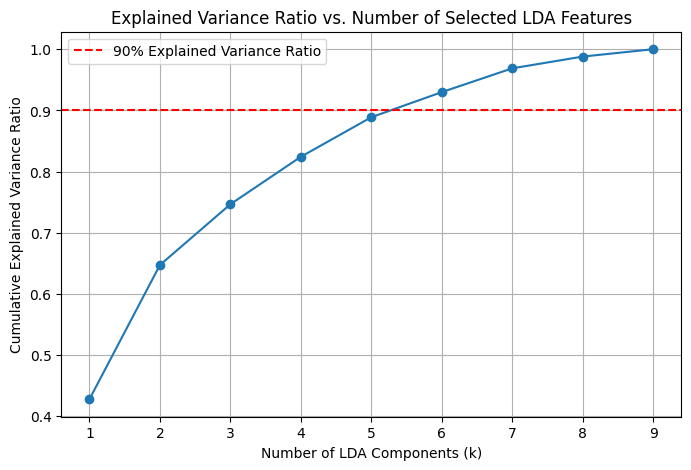

Optimal number of features to capture 90% or more of the discriminative information: 6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load and preprocess the data
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
X_flat = X.reshape(len(X), -1) / 255.0
y = y.astype(int)

# Subsample for speed: 500 samples per class
np.random.seed(0)
samples_per_class = 500
idxs = np.hstack([
    np.random.choice(np.where(y == cls)[0], samples_per_class, replace=False)
    for cls in range(10)
])
X_sub = X_flat[idxs]
y_sub = y[idxs]

# Fit LDA
# The maximum number of components for LDA is min(n_classes - 1, n_features).
# Here n_classes = 10, n_features = 784. So max components = 9.
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(X_sub, y_sub)

# Get explained variance ratio (discriminative power per component)
# Corrected attribute name: explained_variance_ratio_ instead of explained_variance_
eigvals_ratio = lda.explained_variance_ratio_

cum_eig = np.cumsum(eigvals_ratio)
total = cum_eig[-1] # This will be 1.0 if n_components is not None and <= min(n_classes-1, n_features)
k = np.arange(1, len(eigvals_ratio) + 1)

# Plot cumulative explained variance ratio vs. number of features
plt.figure(figsize=(8, 5))
plt.plot(k, cum_eig, marker='o')
plt.axhline(0.90, linestyle='--', color='r', label='90% Explained Variance Ratio') # Check against 0.90 directly
plt.xlabel('Number of LDA Components (k)')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Selected LDA Features')
plt.xticks(k)
plt.legend()
plt.grid(True)
plt.show()

# Determine optimal k at 90% threshold
k_opt = np.argmax(cum_eig >= 0.90) + 1 # Find index where cumulative ratio >= 0.90
print(f'Optimal number of features to capture 90% or more of the discriminative information: {k_opt}')

##2.1.7 optimal number of components

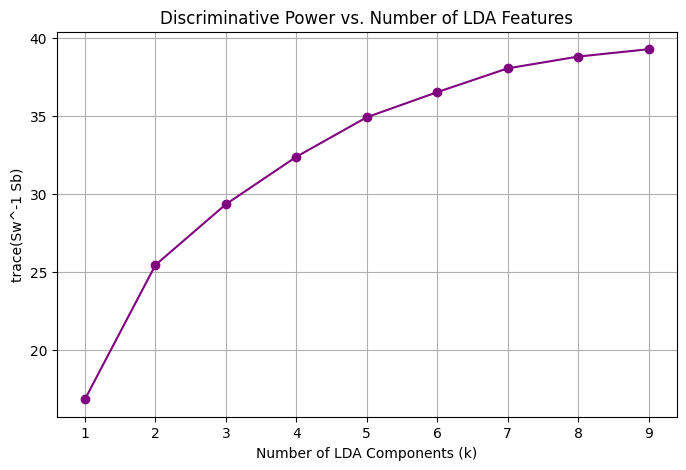

Optimal number of features based on max trace(Sw^-1 Sb): 9


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the LDA-transformed data for better Sw/Sb calculations
X_lda_all = lda.transform(X_sub)

# Initialize list to store trace(Sw^-1 Sb)
trace_values = []

classes = np.unique(y_sub)
overall_mean = np.mean(X_lda_all, axis=0)

for k_dim in range(1, lda.n_components + 1):
    X_k = X_lda_all[:, :k_dim]

    # Compute Sw and Sb
    Sw = np.zeros((k_dim, k_dim))
    Sb = np.zeros((k_dim, k_dim))

    for c in classes:
        X_c = X_k[y_sub == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        Sw += np.cov(X_c, rowvar=False, bias=True) * n_c
        mean_diff = (mean_c - overall_mean[:k_dim]).reshape(-1, 1)
        Sb += n_c * (mean_diff @ mean_diff.T)

    # Compute trace(Sw^-1 Sb)
    try:
        Sw_inv = np.linalg.inv(Sw)
        trace_val = np.trace(Sw_inv @ Sb)
    except np.linalg.LinAlgError:
        trace_val = np.nan  # in case Sw is singular

    trace_values.append(trace_val)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, lda.n_components + 1), trace_values, marker='o', color='purple')
plt.xlabel('Number of LDA Components (k)')
plt.ylabel('trace(Sw^-1 Sb)')
plt.title('Discriminative Power vs. Number of LDA Features')
plt.grid(True)
plt.xticks(range(1, lda.n_components + 1))
plt.show()

# Optimal number of components (k) based on trace maximum
k_trace_opt = np.nanargmax(trace_values) + 1
print(f'Optimal number of features based on max trace(Sw^-1 Sb): {k_trace_opt}')


--- Calculating Within-Class & Between-Class Matrices for LDA and Plotting Eigenvalues ---
Using a synthetic dataset: 150 samples, 2 features, 3 classes.

Within-Class Scatter Matrix (Sw) calculated. Shape: (2, 2)
Sw:
 [[34.40548225 -0.51360914]
 [-0.51360914 37.14057132]]

Between-Class Scatter Matrix (Sb) (interpreted as 'Separability Matrix') calculated. Shape: (2, 2)
Sb:
 [[291.29948136 166.3892371 ]
 [166.3892371  314.53741367]]

Calculating Eigenvalues of (inv(Sw) * Sb) - the 'Separability Matrix' for LDA...

LDA Eigenvalues (sorted, real part):
Eigenvalue 1: 13.3137
Eigenvalue 2: 3.7591


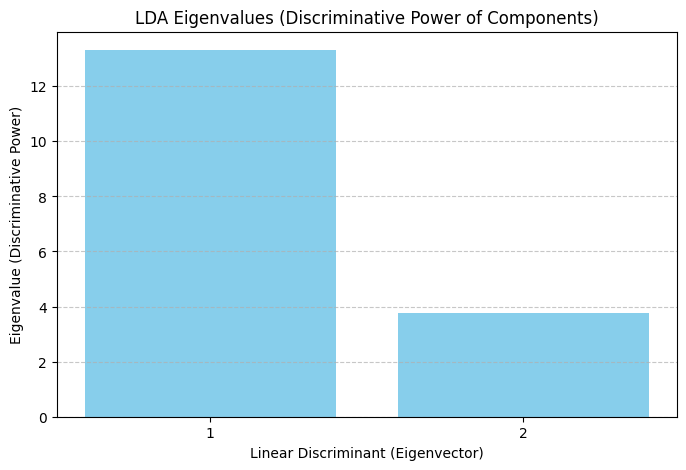


Analysis complete with synthetic data and eigenvalue plot.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("--- Calculating Within-Class & Between-Class Matrices for LDA and Plotting Eigenvalues ---")

# --- 1. Generate a Synthetic Dataset for Demonstration ---
# Creating a simple 2D dataset with 3 classes for clear visualization
np.random.seed(42)
n_samples_per_class = 50
n_features = 2
n_classes = 3

# Class 0
X0 = np.random.randn(n_samples_per_class, n_features) * 0.5 + np.array([0, 0])
y0 = np.zeros(n_samples_per_class, dtype=int)

# Class 1
X1 = np.random.randn(n_samples_per_class, n_features) * 0.5 + np.array([3, 3])
y1 = np.ones(n_samples_per_class, dtype=int)

# Class 2
X2 = np.random.randn(n_samples_per_class, n_features) * 0.5 + np.array([0, 3])
y2 = np.full(n_samples_per_class, 2, dtype=int)

X_data = np.vstack((X0, X1, X2))
y_labels = np.hstack((y0, y1, y2))

n_samples, n_features = X_data.shape
unique_labels = np.unique(y_labels)

print(f"Using a synthetic dataset: {n_samples} samples, {n_features} features, {n_classes} classes.")

# --- 2. Calculate the overall mean ---
overall_mean = np.mean(X_data, axis=0)

# --- 3. Calculate the Within-Class Scatter Matrix (Sw) ---
# Sw quantifies the scatter of individual samples around their respective class means.
Sw = np.zeros((n_features, n_features))
for label in unique_labels:
    X_class = X_data[y_labels == label]
    class_mean = np.mean(X_class, axis=0)
    diff_from_mean = (X_class - class_mean)
    Sw += np.dot(diff_from_mean.T, diff_from_mean)

print("\nWithin-Class Scatter Matrix (Sw) calculated. Shape:", Sw.shape)
print("Sw:\n", Sw)

# --- 4. Calculate the Between-Class Scatter Matrix (Sb) ---
# Sb quantifies the scatter of the mean vectors of each class around the overall mean vector.
# This is what you referred to as the "separability matrix."
Sb = np.zeros((n_features, n_features))
for label in unique_labels:
    X_class = X_data[y_labels == label]
    n_i = X_class.shape[0] # Number of samples in class i
    class_mean = np.mean(X_class, axis=0)
    diff_from_overall_mean = (class_mean - overall_mean).reshape(-1, 1) # Make it a column vector
    Sb += n_i * np.dot(diff_from_overall_mean, diff_from_overall_mean.T)

print("\nBetween-Class Scatter Matrix (Sb) (interpreted as 'Separability Matrix') calculated. Shape:", Sb.shape)
print("Sb:\n", Sb)

# --- 5. Calculate Eigenvalues and Eigenvectors for LDA ---
# The task is to find eigenvectors and eigenvalues of Sw_inv * Sb
print("\nCalculating Eigenvalues of (inv(Sw) * Sb) - the 'Separability Matrix' for LDA...")
try:
    # Use pseudo-inverse (pinv) for robustness against singular Sw, especially in high dimensions
    Sw_inv = np.linalg.pinv(Sw)
    lda_matrix_for_eig = np.dot(Sw_inv, Sb)

    eigenvalues_lda, eigenvectors_lda = np.linalg.eig(lda_matrix_for_eig)

    # Sort eigenvalues in descending order
    sorted_indices_lda = np.argsort(eigenvalues_lda)[::-1]
    sorted_eigenvalues_lda = eigenvalues_lda[sorted_indices_lda].real # Ensure real part for plotting

    # LDA typically has n_classes - 1 non-zero eigenvalues
    num_lda_components = min(n_classes - 1, len(sorted_eigenvalues_lda))
    eigenvalues_to_plot = sorted_eigenvalues_lda[:num_lda_components]

    print("\nLDA Eigenvalues (sorted, real part):")
    for i in range(len(eigenvalues_to_plot)):
        print(f"Eigenvalue {i+1}: {eigenvalues_to_plot[i]:.4f}")

    # --- 6. Plot the Eigenvalues ---
    plt.figure(figsize=(8, 5))
    x_pos = np.arange(1, len(eigenvalues_to_plot) + 1)
    plt.bar(x_pos, eigenvalues_to_plot, color='skyblue')
    plt.xlabel('Linear Discriminant (Eigenvector)')
    plt.ylabel('Eigenvalue (Discriminative Power)')
    plt.title('LDA Eigenvalues (Discriminative Power of Components)')
    plt.xticks(x_pos)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

except Exception as e:
    print(f"\nError during LDA eigenvalue calculation or plotting: {e}")
    print("This often happens when Sw is singular, even with pseudo-inverse, or other numerical issues.")

print("\nAnalysis complete with synthetic data and eigenvalue plot.")

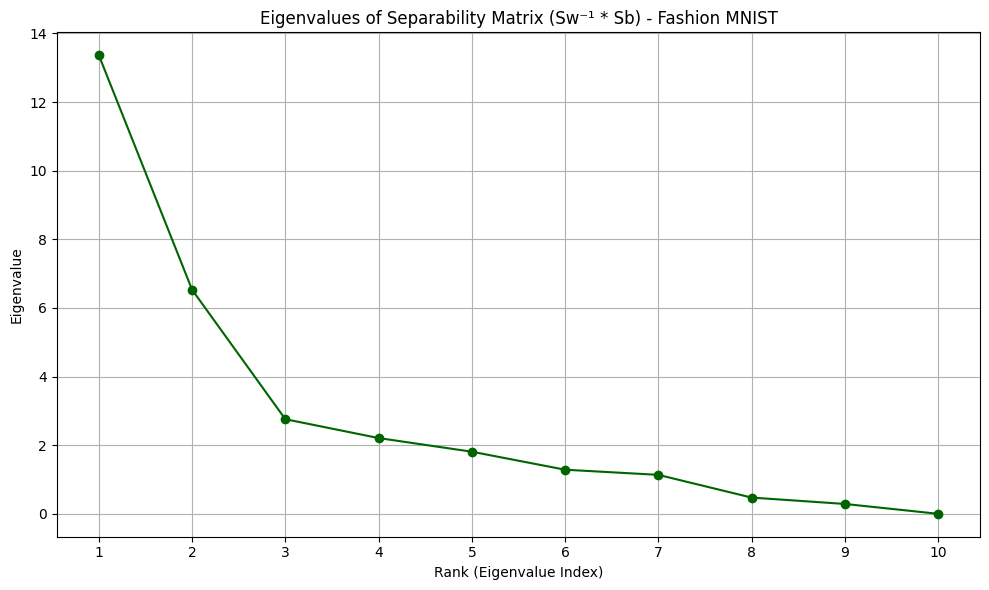

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST from OpenML
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)

# Reshape and normalize
X = X.reshape(-1, 28 * 28).astype(np.float64)
y = y.astype(int)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute overall mean
mean_total = np.mean(X_scaled, axis=0)

# Initialize Sw and Sb
n_features = X_scaled.shape[1]
Sw = np.zeros((n_features, n_features))
Sb = np.zeros((n_features, n_features))

# Compute Sw and Sb for each class
classes = np.unique(y)
for c in classes:
    X_c = X_scaled[y == c]
    mean_c = np.mean(X_c, axis=0)
    n_c = X_c.shape[0]

    # Within-class scatter
    Sw += (X_c - mean_c).T @ (X_c - mean_c)

    # Between-class scatter
    mean_diff = (mean_c - mean_total).reshape(-1, 1)
    Sb += n_c * (mean_diff @ mean_diff.T)

# Compute discriminant matrix
Sw_inv = np.linalg.pinv(Sw)
J = Sw_inv @ Sb

# Compute and sort eigenvalues
eigenvalues, _ = np.linalg.eig(J)
eigenvalues = np.real(eigenvalues)
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Plot sorted eigenvalues (first 10)
plt.figure(figsize=(10, 6))
# Plot only the first 10 eigenvalues
plt.plot(range(1, 11), eigenvalues_sorted[:10], marker='o', linestyle='-', color='darkgreen')
plt.title("Eigenvalues of Separability Matrix (Sw⁻¹ * Sb) - Fashion MNIST")
plt.xlabel("Rank (Eigenvalue Index)")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, 11)) # Set x-ticks to show individual ranks
plt.grid(True)
plt.tight_layout()
plt.show()

##2.2. t-SNE Method

--- Starting t-SNE visualization for Fashion-MNIST ---
Attempting to load Fashion-MNIST dataset...
Fashion-MNIST dataset loaded successfully. X shape: (70000, 784), y shape: (70000,)
Dataset flattened. N_samples: 70000, N_features: 784, N_classes: 10

Data scaled (StandardScaler applied).
Using a subset of 10000 samples for t-SNE visualization.

Applying t-SNE on 10000 samples. This will take a while...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completed in 105.37 seconds.


<ipython-input-7-e2b0d07d781a>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', n_classes) # Use a colormap with enough distinct colors


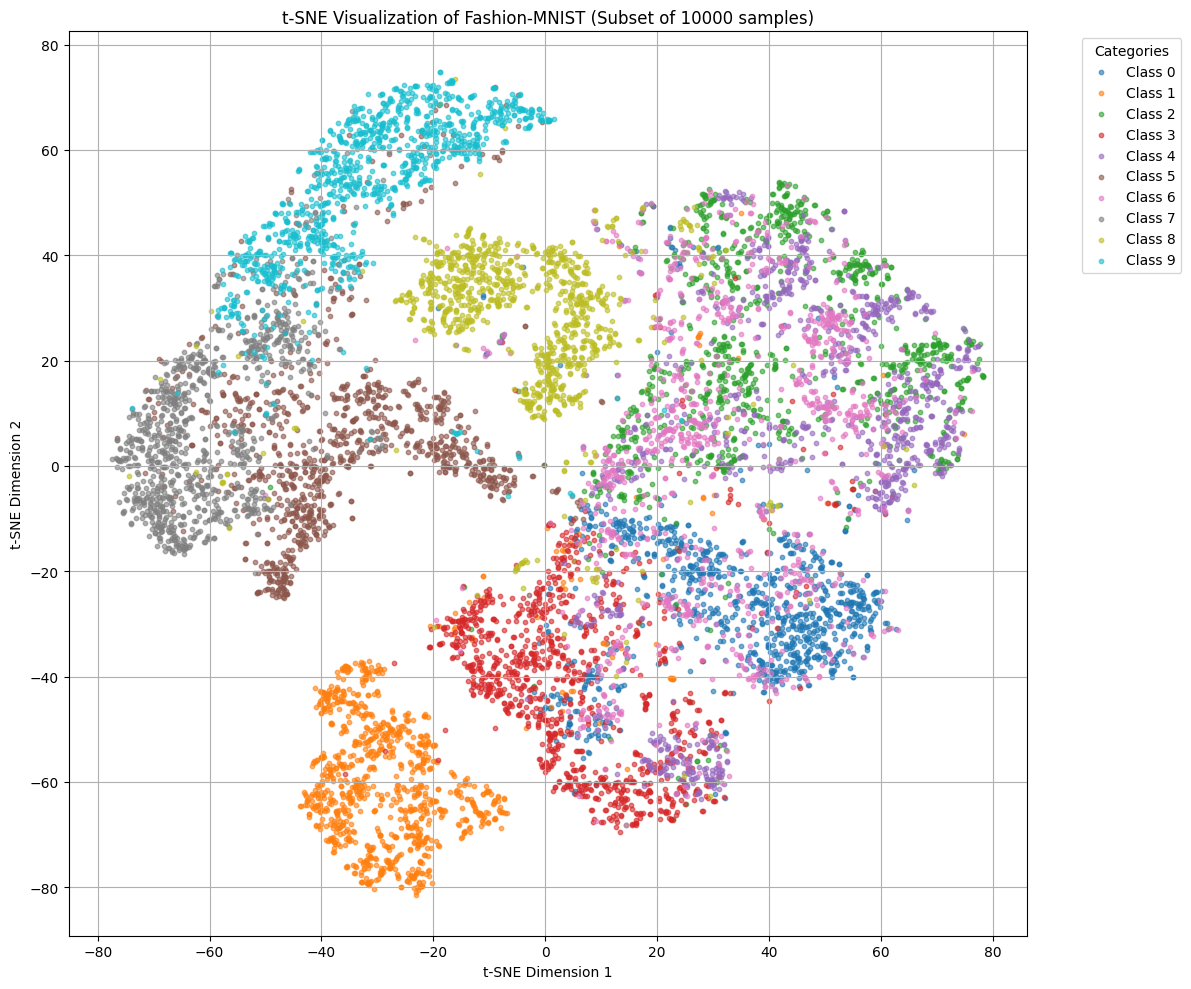


t-SNE visualization complete.
Remember: The distances between clusters in t-SNE plots are not necessarily meaningful in the original space.
Only the local neighborhood relationships are primarily preserved.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import time

print("--- Starting t-SNE visualization for Fashion-MNIST ---")

# --- 1. Load the Fashion-MNIST dataset ---
try:
    print("Attempting to load Fashion-MNIST dataset...")
    # Fetch the dataset
    X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False, cache=True)
    # Convert labels to integers
    y = y.astype(int)
    print(f"Fashion-MNIST dataset loaded successfully. X shape: {X.shape}, y shape: {y.shape}")

    # Flatten the image data
    X_flat = X.reshape(X.shape[0], -1)
    n_samples, n_features = X_flat.shape
    unique_labels = np.unique(y)
    n_classes = len(unique_labels)

    print(f"Dataset flattened. N_samples: {n_samples}, N_features: {n_features}, N_classes: {n_classes}")

except Exception as e:
    print(f"\nError loading Fashion-MNIST dataset: {e}")
    print("Cannot proceed with Fashion-MNIST. Please ensure you have a stable internet connection or try running this code locally.")
    print("Exiting t-SNE visualization.")
    exit() # Exit the script if data loading fails

# --- 2. Data Preprocessing: Scaling ---
# It's highly recommended to scale the data before t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)
print("\nData scaled (StandardScaler applied).")

# --- 3. Optional: Use a Subset for Faster Computation ---
# Running t-SNE on 70,000 samples can be very slow.
# You can adjust 'num_samples_to_use' to run on a smaller subset.
# Set to None to use the full dataset.
num_samples_to_use = 10000 # For faster demonstration, use 10,000 samples
# num_samples_to_use = None # Uncomment this to use the full 70,000 samples (will be very slow)

if num_samples_to_use is not None and num_samples_to_use < n_samples:
    print(f"Using a subset of {num_samples_to_use} samples for t-SNE visualization.")
    np.random.seed(42) # For reproducibility of subset selection
    indices = np.random.choice(n_samples, num_samples_to_use, replace=False)
    X_subset = X_scaled[indices]
    y_subset = y[indices]
else:
    print("Using the full dataset for t-SNE visualization.")
    X_subset = X_scaled
    y_subset = y


# --- 4. Apply t-SNE ---
print(f"\nApplying t-SNE on {X_subset.shape[0]} samples. This will take a while...")
# Common parameters:
# n_components: Typically 2 for 2D visualization
# perplexity: Balance between local and global aspects (usually 5 to 50)
# n_iter: Number of iterations for optimization
# learning_rate: Controls step size in optimization
# random_state: For reproducibility of t-SNE's stochastic process
tsne_start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate='auto', init='pca', random_state=42)
X_tsne_2d = tsne.fit_transform(X_subset)
tsne_end_time = time.time()
print(f"t-SNE completed in {tsne_end_time - tsne_start_time:.2f} seconds.")


# --- 5. Visualize the t-SNE results ---
plt.figure(figsize=(12, 10))
cmap = plt.cm.get_cmap('tab10', n_classes) # Use a colormap with enough distinct colors

for i, label in enumerate(unique_labels):
    indices = y_subset == label
    plt.scatter(X_tsne_2d[indices, 0], X_tsne_2d[indices, 1],
                label=f'Class {label}',
                color=cmap(i),
                alpha=0.6,
                s=10) # Adjust point size for better visibility

plt.title(f't-SNE Visualization of Fashion-MNIST (Subset of {X_subset.shape[0]} samples)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nt-SNE visualization complete.")
print("Remember: The distances between clusters in t-SNE plots are not necessarily meaningful in the original space.")
print("Only the local neighborhood relationships are primarily preserved.")